In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import joblib
import matplotlib.pyplot as plt
import itertools

from matplotlib.gridspec import GridSpec
from tensorflow.keras.models import load_model
from keras.preprocessing.text import tokenizer_from_json
from tensorflow.keras.preprocessing.sequence import pad_sequences


dataset_dir = 'sentiment140'
# dataset_dir = 'imdb'
# dataset_dir = 'coronaNLP'

vaccines = ["biontech", "janssen", "moderna",
            "oxford", "sinopharm", "sinovac", "sputnik"]



years = ["2020", "2021", "2022"]
months = ["january", "february", "march", "april", "may", "june",
          "july", "august", "september", "october", "november", "december"]


## MONTHS
# models_dir = '../models/NN_model_seven_12008898266757515530_0.7899888157844543'
# tokenizers_dir = '../tokenizers/12008898266757515530.pkl'
# model = load_model(models_dir)
# model.summary()
# tokenizer = joblib.load(tokenizers_dir)
# word_index = tokenizer.word_index
# for year in years:
#     for month in months:
    
#         # already processed
#         try:
#             df = pd.read_csv(f'../{year}-data/covid-{month}.csv', delimiter=',')
#         except Exception:
#             continue

#         df = df.drop_duplicates()

#         df = df[['tweet', 'sentiment']]

#         df.head()
        

#         X = df.iloc[:, 0].fillna(' ')

#         tweets = X

#         num_of_tweets_analyzed = len(tweets)

#         sequences = tokenizer.texts_to_sequences(X)


#         # Max number of words in a sequence
#         max_length = 37

#         padded = pad_sequences(
#             sequences, maxlen=max_length, padding="post", truncating="post")

#         # Check reversing the indices

#         # flip (key, value)
#         reverse_word_index = dict([(idx, word) for (word, idx) in word_index.items()])

#         def decode(sequence):
#             return " ".join([reverse_word_index.get(idx, "?") for idx in sequence])

#         predictions = model.predict(padded)

#         # Only for BinaryCrossentropy
#         predictions = [1 if p > 0.5 else 0 for p in predictions]

#         # saving tweets to csv
#         tweets.to_csv(f'../analysis/tweets-{month}-{year}.csv')
#         # saving sentiment predictions to csv
#         np.savetxt(f'../analysis/predictions-{month}-{year}.csv',
#                    predictions, delimiter=',', fmt=('%s'))

#         # adding sentiment column to the beginning
#         df = pd.read_csv(
#             f'../analysis/predictions-{month}-{year}.csv', header=None)
#         df.rename(columns={0: 'sentiment'}, inplace=True)
#         # save to new csv file
#         df.to_csv(
#              f'../analysis/predictions-{month}-{year}.csv', index=False)

#         # merging tweets and predictions
#         filenames = [f'../analysis/tweets-{month}-{year}.csv',
#                        f'../analysis/predictions-{month}-{year}.csv']
#         dfs = []
#         for filename in filenames:
#             # read the csv, making sure the first two columns are str
#             df = pd.read_csv(filename, header=None,
#                              converters={0: str, 1: str})
#             # change the column names so they won't collide during concatenation
#             df.columns = [filename + str(cname) for cname in df.columns]
#             dfs.append(df)

#         # concatenate them horizontally
#         merged = pd.concat(dfs, axis=1)
#         # write it out
#         merged.to_csv(
#             f"../analysis/merged-{month}-{year}.csv", header=None, index=None)

#         df = pd.read_csv(f'../analysis/merged-{month}-{year}.csv')

#         labels = ['negative', 'positive']

#         title_type = df.groupby('sentiment').agg('count')

#         type_labels = ['positive', 'negative']
#         type_counts = title_type.tweet.sort_values()

#         colors = ['g', 'r']

#         plt.subplot(
#             aspect=1, title=f'Percentage of tweets pro or against vaccination in {month.capitalize()} {year}\nClassified {num_of_tweets_analyzed} tweets.')
#         type_show_ids = plt.pie(type_counts, labels=type_labels,
#                                 autopct='%1.1f%%', shadow=True, colors=colors)
#         plt.savefig(f"../visuals/{month}-{year}.png")


In [2]:

## WAR!!
war = []

for file in os.listdir("../data/"):
    war.append(file)
    

models_dir = '../models/NN_model_seven_12008898266757515530_0.7899888157844543'
tokenizers_dir = '../tokenizers/12008898266757515530.pkl'
model = load_model(models_dir)
model.summary()
tokenizer = joblib.load(tokenizers_dir)
word_index = tokenizer.word_index



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embeddinglayer (Embedding)  (None, 37, 64)            3200000   
                                                                 
 bidirectional (Bidirectiona  (None, 37, 64)           24832     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,251,777
Trainable params: 3,251,777
Non-

In [3]:
accs0 = []

for lang in war:
    print(lang)
    # already processed
    df = pd.read_csv(f'../data/{lang}', delimiter=',')
    df = df.drop_duplicates()
    df = df[['tweet', 'translate', 'sentiment']]
    if not lang == 'war.csv' and not lang == 'war2.csv':
        df['tweet'] = df['translate']

    X = df.iloc[:, 0].fillna(' ')

    tweets = X

    num_of_tweets_analyzed = len(tweets)

    sequences = tokenizer.texts_to_sequences(X)

    # Max number of words in a sequence
    max_length = 37

    padded = pad_sequences(
        sequences, maxlen=max_length, padding="post", truncating="post")

    # Check reversing the indices

    # flip (key, value)
    reverse_word_index = dict([(idx, word)
                                for (word, idx) in word_index.items()])


    predictions = model.predict(padded)
    
    # Only for BinaryCrossentropy
    predictions = np.array([1 if p > 0.5 else 0 for p in predictions])
    print(np.count_nonzero(predictions == 1), np.count_nonzero(predictions == 0))
    
    # saving tweets to csv
    tweets.to_csv(f'../analysis/tweets-{lang}.csv')
    # saving sentiment predictions to csv
    np.savetxt(f'../analysis/predictions-{lang}.csv',
            predictions, delimiter=',', fmt=('%s'))
    # adding sentiment column to the beginning
    df = pd.read_csv(
        f'../analysis/predictions-{lang}.csv', header=None)
    df.rename(columns={0: 'sentiment'}, inplace=True)
    # save to new csv file
    df.to_csv(
        f'../analysis/predictions-{lang}.csv', index=False)
    # merging tweets and predictions
    filenames = [f'../analysis/tweets-{lang}.csv',
                f'../analysis/predictions-{lang}.csv']
    dfs = []
    for filename in filenames:
        # read the csv, making sure the first two columns are str
        df = pd.read_csv(filename, header=None,
                        converters={0: str, 1: str})
        # change the column names so they won't collide during concatenation
        df.columns = [filename + str(cname) for cname in df.columns]
        dfs.append(df)
    # concatenate them horizontally
    merged = pd.concat(dfs, axis=1)
    # write it out
    merged.to_csv(
        f"../analysis/merged-{lang}.csv", header=None, index=None)
    df = pd.read_csv(f'../analysis/merged-{lang}.csv')
    title_type = df.groupby('sentiment').agg('count')
    type_labels = ['positive', 'negative']
    type_counts = title_type.tweet.sort_values()
    accs0.append(type_counts)


war-french.csv
49 60
war-german.csv
942 732
war-italian.csv
111 59
war-norwegian.csv
143 120
war-polish.csv
97 55
war-russian.csv
532 209
war-spanish.csv
759 713
war.csv
6914 6400


In [4]:
accs = np.array(accs0)
f2 = lambda x: [round(x[0]/(x[0]+x[1])*100, 2), round(x[1]/(x[0]+x[1])*100, 2)]
# accs[-2] = 0
accs = [f2(x) for x in accs]
accs

[[44.95, 55.05],
 [43.73, 56.27],
 [34.71, 65.29],
 [45.63, 54.37],
 [36.18, 63.82],
 [28.21, 71.79],
 [48.44, 51.56],
 [48.07, 51.93]]

In [5]:
counts = [x[0]+x[1] for x in accs0]
counts

[109, 1674, 170, 263, 152, 741, 1472, 13314]

In [6]:
langs = [ "french", "german", "italian", "norwegian", "polish", "russian", "spanish", "english"]

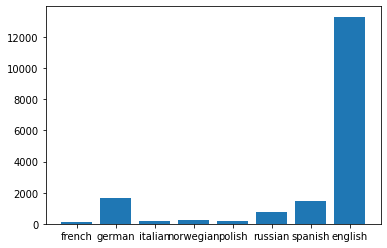

In [7]:
plt.bar(langs, counts)
plt.show()

<Figure size 432x288 with 0 Axes>

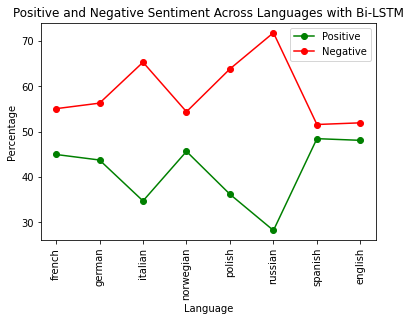

In [10]:
from cycler import cycler

plt.figure()
fig, ax = plt.subplots()
plt.xticks(rotation=90)
plt.rc('axes', prop_cycle=(cycler('color', ['g', 'r'])))
ax.plot(langs, accs, ls='-', marker='o', label=['Positive', 'Negative'])  

plt.xlabel("Language")
plt.ylabel("Percentage")
plt.title("Positive and Negative Sentiment Across Languages with Bi-LSTM")
ax.legend()
plt.savefig(f"../visuals/yayin/rnn/war.png")
plt.show()

In [9]:
# ## VACCINES
# models_dir = '../models/NN_model_seven_12008898266757515530_0.7899888157844543'
# tokenizers_dir = '../tokenizers/12008898266757515530.pkl'
# model = load_model(models_dir)
# model.summary()
# tokenizer = joblib.load(tokenizers_dir)
# word_index = tokenizer.word_index
# for vaccine in vaccines:
    
    
#     # already processed
#     df = pd.read_csv(f'../vaccines/{vaccine}.csv', delimiter=',')
#     df = df.drop_duplicates()
#     df = df[['tweet', 'sentiment']]
    
    
    
    

#     X = df.iloc[:, 0].fillna(' ')

#     tweets = X

#     num_of_tweets_analyzed = len(tweets)

#     sequences = tokenizer.texts_to_sequences(X)

#     # Max number of words in a sequence
#     max_length = 37

#     padded = pad_sequences(
#           sequences, maxlen=max_length, padding="post", truncating="post")

#     # Check reversing the indices

#     # flip (key, value)
#     reverse_word_index = dict([(idx, word)
#                                   for (word, idx) in word_index.items()])

#     def decode(sequence):
#         return " ".join([reverse_word_index.get(idx, "?") for idx in sequence])

#     predictions = model.predict(padded)

#     # Only for BinaryCrossentropy
#     predictions = [1 if p > 0.5 else 0 for p in predictions]
#     # saving tweets to csv
#     tweets.to_csv(f'../analysis/tweets-{vaccine}.csv')
#     # saving sentiment predictions to csv
#     np.savetxt(f'../analysis/predictions-{vaccine}.csv',
#                predictions, delimiter=',', fmt=('%s'))
#     # adding sentiment column to the beginning
#     df = pd.read_csv(
#         f'../analysis/predictions-{vaccine}.csv', header=None)
#     df.rename(columns={0: 'sentiment'}, inplace=True)
#     # save to new csv file
#     df.to_csv(
#          f'../analysis/predictions-{vaccine}.csv', index=False)
#     # merging tweets and predictions
#     filenames = [f'../analysis/tweets-{vaccine}.csv',
#                    f'../analysis/predictions-{vaccine}.csv']
#     dfs = []
#     for filename in filenames:
#         # read the csv, making sure the first two columns are str
#         df = pd.read_csv(filename, header=None,
#                          converters={0: str, 1: str})
#         # change the column names so they won't collide during concatenation
#         df.columns = [filename + str(cname) for cname in df.columns]
#         dfs.append(df)
#     # concatenate them horizontally
#     merged = pd.concat(dfs, axis=1)
#     # write it out
#     merged.to_csv(
#         f"../analysis/merged-{vaccine}.csv", header=None, index=None)
#     df = pd.read_csv(f'../analysis/merged-{vaccine}.csv')
#     labels = ['negative', 'positive']
#     title_type = df.groupby('sentiment').agg('count')
#     type_labels = ['positive', 'negative']
#     type_counts = title_type.tweet.sort_values()
#     colors = ['g', 'r']
#     plt.subplot(
#         aspect=1, title=f'Percentage of tweets pro or against vaccines branded by {vaccine}\nClassified {num_of_tweets_analyzed} tweets.')
#     type_show_ids = plt.pie(type_counts, labels=type_labels,
#                             autopct='%1.1f%%', shadow=True, colors=colors)
#     plt.savefig(f"../visuals/{vaccine}.png")